## Import Modules 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Load Data

In [2]:
filename = r"C:\Users\thema\OneDrive\Projects\JPMC_Fraud_Analysis\data\fraudTrain.csv"
df = pd.read_csv(filename)

## EDA

In [3]:
df.shape

(1296675, 23)

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#### Feature Modification
* drop unnamed column
* split trans_date_trans_time into two columns
* drop name features

In [6]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [7]:
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand = True)

In [8]:
df.drop(columns = ['first', 'last', 'trans_date_trans_time'], inplace =  True)

In [9]:
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [10]:
df['job'].nunique()

494

* can perform tf-idf on job values to better organize correlations

In [11]:
df.dtypes

cc_num          int64
merchant       object
category       object
amt           float64
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
trans_date     object
trans_time     object
dtype: object

* street might not be relevant, since we have latitude and longitude
* further work is needed so the latitude and longitude can refer to location as opposed to random numerical values

In [12]:
df['category'].nunique()

14

In [13]:
df['merchant'].nunique()

693

In [14]:
counts = df['merchant'].value_counts()
num_categories = len(counts[counts > 100])

num_categories

693

In [15]:
num_categories = len(counts[counts > 1000])

num_categories

594

* find out what merchant refers to, and why fraud is in each value
* The values in merchant are well spread, so it seems to be a useful feature(certain merchants might be more suseptible to fraud)

#### One Hot Encoding

In [16]:
df = pd.get_dummies(df, columns=['gender'])
df.head()

,cc_num,merchant,category,amt,street,city,state,zip,lat,long,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,gender_F,gender_M
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,1,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,1,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,0,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,0,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,0,1


In [17]:
cc_count = (df['cc_num'].astype(str).str.len() == 16).sum()
cc_count

649148

In [18]:
cc_length = df['cc_num'].astype(str).str.len().unique()
cc_length

array([16, 12, 14, 15, 13, 19, 11], dtype=int64)

In [19]:
# Convert the column values to strings
df['str_values'] = df['cc_num'].astype(str)

# Count the number of values for each unique length
count_dict = {}
for length in cc_length:
    count = (df['str_values'].str.len() == length).sum()
    count_dict[length] = count
    
count_dict

{16: 649148,
 12: 91468,
 14: 125985,
 15: 215968,
 13: 89206,
 19: 118789,
 11: 6111}

* possible correlation between cc_length and fraud

In [21]:
cols = [col for col in df.columns if col != 'is_fraud']
cols.append('is_fraud')
df = df[cols]

In [22]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\thema\AppData\Local\Temp\ipykernel_33348\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M,is_fraud
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.001112,0.001112,-0.000981
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,-0.001034,0.001034,0.219404
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,0.065951,-0.065951,-0.002162
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,-0.042935,0.042935,0.001894
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,-0.050404,0.050404,0.001721
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.028649,-0.028649,0.002136
unix_time,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,0.000960,-0.000960,-0.005078
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,-0.042645,0.042645,0.001741
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,-0.050350,0.050350,0.001721
gender_F,-0.001112,-0.001034,0.065951,-0.042935,-0.050404,0.028649,0.000960,-0.042645,-0.050350,1.000000,-1.000000,-0.007642


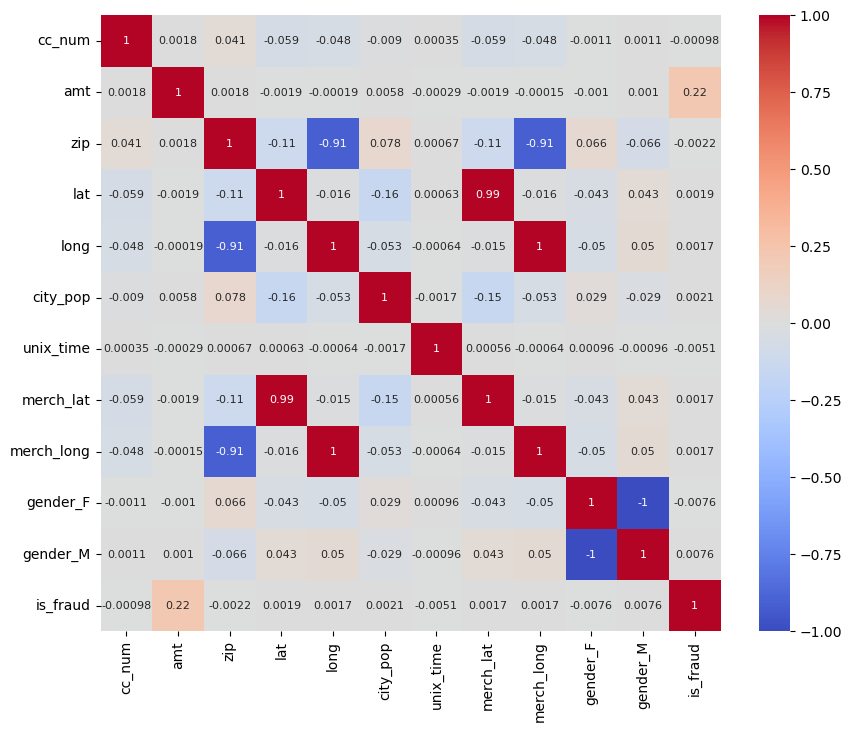

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.show()


* oof